Task 1 - tobuy: 15
Task 2 - Price: 600, Stock: 20, Order: 0
Task 2 - Price: 580, Stock: 18, Order: 0
Task 2 - Price: 550, Stock: 12, Order: 0
Task 2 - Price: 500, Stock: 20, Order: 0
Task 2 - Price: 650, Stock: 5, Order: 10
Task 2 - Price: 620, Stock: 15, Order: 0


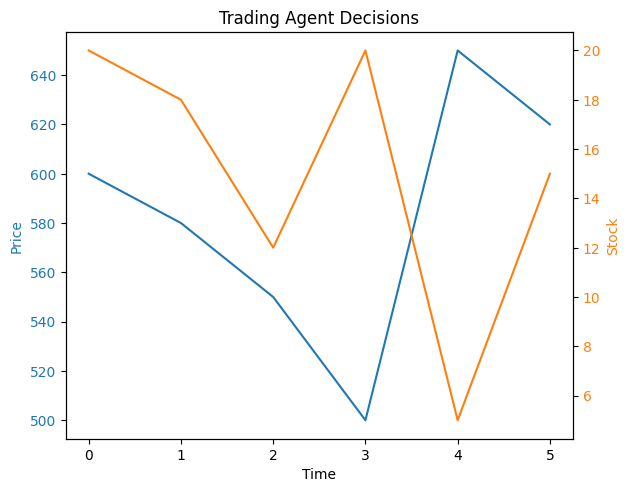

In [2]:
import matplotlib.pyplot as plt

def calculate_tobuy(last_price, ave, instock):
    if last_price < 0.7 * ave and instock < 30:
        tobuy = 15
    elif instock < 10:
        tobuy = 5
    else:
        tobuy = 0
    return tobuy

class TradingAgent:
    def __init__(self, ave_price, discount_threshold=0.2, critical_stock_level=10, order_quantity=15, min_order_quantity=10):
        self.ave_price = ave_price
        self.discount_threshold = discount_threshold
        self.critical_stock_level = critical_stock_level
        self.order_quantity = order_quantity
        self.min_order_quantity = min_order_quantity

    def decide_order(self, current_price, instock):
        if current_price < (1 - self.discount_threshold) * self.ave_price and instock >= self.critical_stock_level:
            tobuy = self.order_quantity
        elif instock < self.critical_stock_level:
            tobuy = self.min_order_quantity
        else:
            tobuy = 0
        return tobuy

    def plot_decision(self, prices, stocks):
        orders = [self.decide_order(p, s) for p, s in zip(prices, stocks)]

        fig, ax1 = plt.subplots()

        ax1.set_xlabel('Time')
        ax1.set_ylabel('Price', color='tab:blue')
        ax1.plot(prices, label='Price', color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        ax2 = ax1.twinx()
        ax2.set_ylabel('Stock', color='tab:orange')
        ax2.plot(stocks, label='Stock', color='tab:orange')
        ax2.tick_params(axis='y', labelcolor='tab:orange')

        fig.tight_layout()
        plt.title('Trading Agent Decisions')
        plt.show()

# Example usage
if __name__ == "__main__":
    # Task 1 example
    last_price = 50
    ave = 80
    instock = 25
    tobuy = calculate_tobuy(last_price, ave, instock)
    print(f"Task 1 - tobuy: {tobuy}")

    # Task 2 example
    agent = TradingAgent(ave_price=600)

    prices = [600, 580, 550, 500, 650, 620]
    stocks = [20, 18, 12, 20, 5, 15]

    for price, stock in zip(prices, stocks):
        tobuy = agent.decide_order(price, stock)
        print(f"Task 2 - Price: {price}, Stock: {stock}, Order: {tobuy}")

    agent.plot_decision(prices, stocks)
